Exercise 4
==========

In [1]:
import numpy
from matplotlib import pyplot
from matplotlib import colors
% matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.split(os.path.split(os.getcwd())[0])[0])

In [3]:
import utils.quadrature as quad
import utils.grids.one_d as assembly

## (a)

Solve the same projection problem as it is in exercise 3 but with $0 \le x \le 10$ and $N_{el}=10$ with polynomial order $P=8$ for each element.

In [4]:
def ex_a(a, expansion):
    """A wrapper for exercise a"""
    
    f = lambda x: numpy.sin(x)
    qd = quad.GaussLobattoJacobi(10)
    
    G = a(10, [0, 10], expansion, 8)
    fi = numpy.zeros(G.nModes, dtype=numpy.float64)

    for i, e in enumerate(G.elems):
        for j, expn in enumerate(e.expn):
            fi[G.l2g[i][j]] += \
                numpy.sum(expn(qd.nodes) * f(e.xi_to_x(qd.nodes)) * qd.weights)

    G.set_coeffs(numpy.linalg.solve(G.M, fi))

    x = numpy.linspace(0, 10, 200)
    err = G(x) - f(x)
    norm = numpy.linalg.norm(err, 2)

    print("The l2-norm of error is: {}".format(norm))
    print("The matrix pattern is:")
    pyplot.matshow(numpy.where(G.M != 0, 1, 0), 
                   cmap=colors.ListedColormap(['white', 'black']));

### Sequential ordering + Common p-type Jacobi expansion

The l2-norm of error is: 1.7106207690798694e-10
The matrix pattern is:


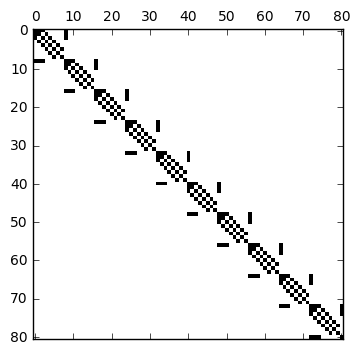

In [5]:
ex_a(assembly.SequentialAssembly, "CommonJacobi")

### Sequential ordering + Gauss-Lobatto-Legendre Lagrange expansion

The l2-norm of error is: 2.3566063215332412e-09
The matrix pattern is:


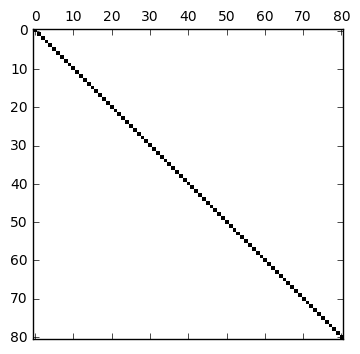

In [6]:
ex_a(assembly.SequentialAssembly, "GaussLobattoJacobi")

### Decomposed ordering + Common p-type Jacobi expansion

The l2-norm of error is: 1.7106092887248066e-10
The matrix pattern is:


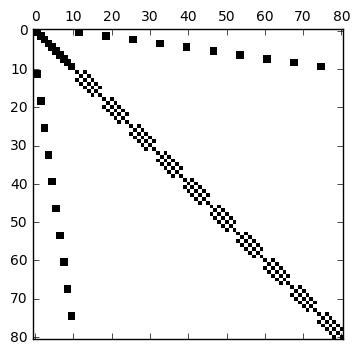

In [7]:
ex_a(assembly.DecomposeAssembly, "CommonJacobi")

### Decomposed ordering + Gauss-Lobatto-Legendre Lagrange expansion

The l2-norm of error is: 2.3566063215332412e-09
The matrix pattern is:


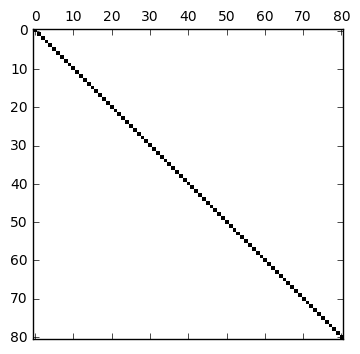

In [8]:
ex_a(assembly.DecomposeAssembly, "GaussLobattoJacobi")

## (b)

Repeat the exercise (a) but lift Dirichlet BCs (i.e. 0th mode on 0th element and final mode on the final element).

In [9]:
def ex_b(a, expansion):
    """A wrapper for exercise a"""
    
    f = lambda x: numpy.sin(x)
    uBC1 = f(0.); uBC2 = f(10.)
    qd = quad.GaussLobattoJacobi(10)
    
    G = a(10, [0, 10], expansion, 8)
    fi = numpy.zeros(G.nModes, dtype=numpy.float64)

    for i, e in enumerate(G.elems):
        for j, expn in enumerate(e.expn):
            fi[G.l2g[i][j]] += \
                numpy.sum(expn(qd.nodes) * f(e.xi_to_x(qd.nodes)) * qd.weights)

    fi -= uBC1 * G.M[:, G.l2g[0][0]].A.flatten()
    fi -= uBC2 * G.M[:, G.l2g[-1][-1]].A.flatten()
    fi = numpy.delete(fi, [G.l2g[0][0], G.l2g[-1][-1]])
    
    M = numpy.delete(G.M, [G.l2g[0][0], G.l2g[-1][-1]], 0)
    M = numpy.delete(M, [G.l2g[0][0], G.l2g[-1][-1]], 1)
    
    soln = numpy.linalg.solve(M, fi)
    soln = numpy.insert(soln, G.l2g[0][0], uBC1)
    soln = numpy.insert(soln, G.l2g[-1][-1], uBC2)
    G.set_coeffs(soln)

    x = numpy.linspace(0, 10, 200)
    err = G(x) - f(x)
    norm = numpy.linalg.norm(err, 2)

    print("The l2-norm of error is: {}".format(norm))
    print("The pattern of lifted matrix is:")
    pyplot.matshow(numpy.where(M != 0, 1, 0), 
                   cmap=colors.ListedColormap(['white', 'black']));

### Sequential ordering + Common p-type Jacobi expansion

The l2-norm of error is: 1.55922781013095e-10
The pattern of lifted matrix is:


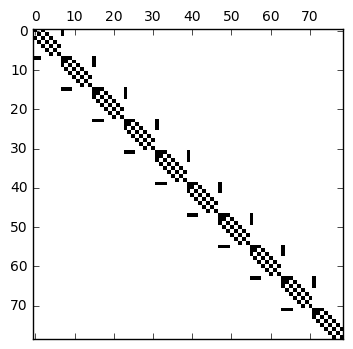

In [10]:
ex_b(assembly.SequentialAssembly, "CommonJacobi")

### Sequential ordering + Gauss-Lobatto-Legendre Lagrange expansion

The l2-norm of error is: 2.3128837929282067e-09
The pattern of lifted matrix is:


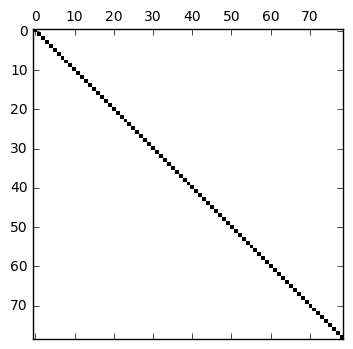

In [11]:
ex_b(assembly.SequentialAssembly, "GaussLobattoJacobi")

### Decomposed ordering + Common p-type Jacobi expansion

The l2-norm of error is: 1.5592320833438038e-10
The pattern of lifted matrix is:


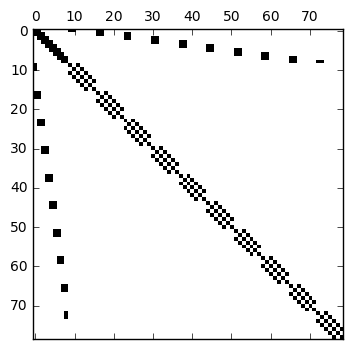

In [12]:
ex_b(assembly.DecomposeAssembly, "CommonJacobi")

### Decomposed ordering + Gauss-Lobatto-Legendre Lagrange expansion

The l2-norm of error is: 2.3128837929282067e-09
The pattern of lifted matrix is:


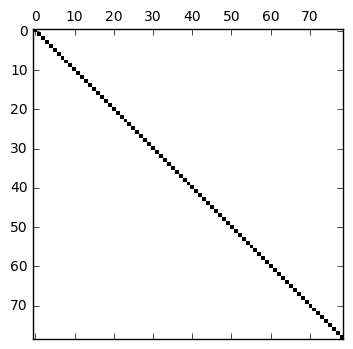

In [13]:
ex_b(assembly.DecomposeAssembly, "GaussLobattoJacobi")